# IAB딥러닝 10월 24일
> Assignment2

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김준형

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# plt.plot 오류 발생 시 사용

# 1. 단순회귀모형

`-` 주어진 자료는 아래와 같다

In [44]:
torch.manual_seed(7676)
x = torch.randn(100).sort().values
ϵ = torch.randn(100) * 0.5
y = 2.5 + 4 * x + ϵ

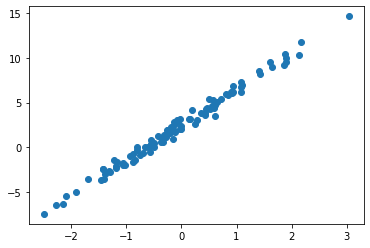

In [33]:
plt.plot(x, y, 'o')

아래와 같은 모형을 가정하고 물음에 답하라. 

$$y_i = w_0+w_1 x_i +\epsilon_i, \quad \epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$$

`(1)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$으로 선택하고 $\hat{y}_i$를 계산하라.

In [34]:
What = torch.tensor([-5.0, 10.0], requires_grad = True)

ones = torch.ones(100)
X = torch.stack([ones, x]).T

yhat = X @ What
yhat

tensor([-29.8782, -27.7651, -26.4986, -26.0023, -24.1670, -21.8688, -19.5627,
        -19.2862, -19.2149, -19.0213, -18.7734, -18.0708, -17.9723, -17.2815,
        -16.9199, -16.8004, -16.6273, -15.6550, -15.5235, -15.2935, -14.3339,
        -13.7201, -13.6836, -13.3592, -13.0878, -12.9713, -12.4216, -11.9044,
        -11.6553, -10.9863, -10.7113, -10.6500, -10.5729, -10.4329, -10.0421,
        -10.0078,  -9.1567,  -8.6230,  -8.5210,  -8.3619,  -8.1753,  -7.7797,
         -7.6614,  -7.6298,  -7.3776,  -7.0064,  -6.7949,  -6.7463,  -6.5821,
         -6.4386,  -6.2852,  -6.1411,  -6.1366,  -5.8068,  -5.5756,  -5.2467,
         -5.2193,  -5.0850,  -5.0556,  -3.6588,  -3.4521,  -3.0487,  -2.6178,
         -2.1624,  -1.3641,  -0.7909,  -0.7820,  -0.6181,  -0.4360,   0.0457,
          0.1243,   0.5338,   0.6965,   0.9851,   1.0352,   1.1401,   1.5370,
          2.1196,   3.0453,   3.4530,   3.9999,   4.1552,   4.1998,   4.3760,
          4.4161,   5.7413,   5.7544,   5.8394,   5.9037,   8.99

`(2)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$에 대한 MSELoss를 계산하라. 즉 

$$loss(\hat{w}_0,\hat{w}_1)$$ 

를 계산하라. 단, $loss(w_0,w_1)=\frac{1}{n}\sum_{i=1}^{n}(y_i-w_0-w_1x_i)^2$.

In [35]:
loss = torch.sum((y - yhat) ** 2)
loss

tensor(10389.6895, grad_fn=<SumBackward0>)

`(3)` $(\hat{w}_0,\hat{w}_1)=(-5,10)$에서 MSELoss의 미분계수를 구하라. 즉 아래를 계산하라. 

$$\frac{\partial}{\partial {\bf W}}loss(w_0,w_1) ~\Bigg|_{~\hat{w}_0,\hat{w}_1}$$


In [36]:
loss.backward()

In [37]:
What, What.grad

(tensor([-5., 10.], requires_grad=True), tensor([-1572.8994,  1471.9844]))

`(4)` 경사하강법을 이용하여 $(\hat{w}_0, \hat{w}_1)$의 값을 1회 업데이트하라. (학습률은 $\alpha=0.1$로 설정하라) 

In [39]:
alpha = 0.1

Wafter = What.data - alpha * What.grad
Wafter

tensor([ 152.2899, -137.1984])

`(5)` 이 모형에 대한 적절한 $(\hat{w}_0, \hat{w}_1)$의 값을 추정하라.

In [48]:
What = torch.tensor([-5.0, 10.0], requires_grad = True)
alpha = 0.001
for epoch in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat) ** 2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    What.grad = None

In [49]:
What.data

tensor([2.5208, 3.9584])

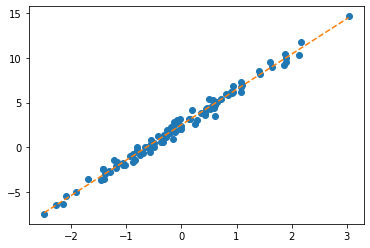

In [50]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')

# 2. 로지스틱모형

`-` 주어진 자료는 아래와 같다

In [51]:
torch.manual_seed(7676)
x1 = torch.tensor(np.random.randint(low = 100, high = 199, size = 10000)) * 5
x2 = torch.tensor(np.random.randint(low = 150, high = 429, size = 10000)) / 100
u = x1 * (1 / 100) + x2 * (1.9) - 12.8
v = torch.nn.Sigmoid()(u)
y = torch.bernoulli(v)

 - x1, x2, y는 각각 토익점수 , GPA, 취업성공을 의미하는 변수

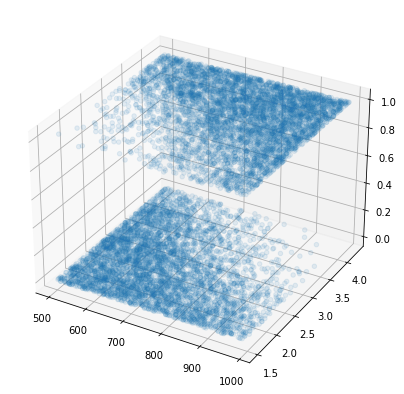

In [52]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.scatter3D(x1, x2, y, alpha = 0.1)

문제 : 토익과 GPA로 취업여부를 판단하는 적절한 네트워크를 학습

In [53]:
X = torch.stack([x1, x2], axis = 1)
y = y.reshape(-1, 1)

In [54]:
net = torch.nn.Linear(in_features = 2, out_features = 1)
optimizer = torch.optim.Adam(net.parameters())
loss_fn = torch.nn.BCEWithLogitsLoss()
for epoch in range(10000):
    yhat = net(X)
    loss = loss_fn(yhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [55]:
((yhat > 0) == y).float().mean()

tensor(0.7897)

In [57]:
((v > 0.5) == y.reshape(-1)).float().mean()
# true를 알고 있다고 가정하였을 경우, 0.7905가 최대예측이므로 이 이상의 accuracy를 보이는 모형은 잘못적합한 모형

tensor(0.7905)

# 3. 과적합과 드랍아웃

`-` 주어진 자료는 아래와 같다

In [58]:
torch.manual_seed(20)
x = torch.linspace(0, 1, 200).reshape(200, 1)
eps = torch.concat([torch.normal(0, 0.1, [60, 1]), torch.normal(0, 0.075, [60 ,1]), torch.normal(0, 0.05, [80 ,1])])
y = 0.5 * x + eps

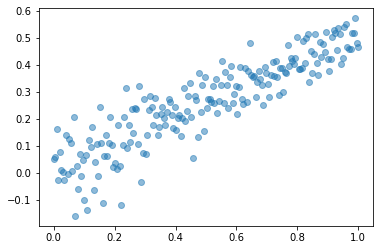

In [59]:
plt.plot(x, y, 'o', alpha = 0.5)

`(1)` 아래와 같이 자료를 분리하라. 
- ${\boldsymbol x}=(x_1,\dots,x_{200}) \to  {\boldsymbol x}_{train} = (x_1\dots,x_{150}), ~{\boldsymbol x}_{test}=(x_{151},\dots,x_{200})$
- ${\boldsymbol y}=(y_1,\dots,y_{200}) \to  {\boldsymbol y}_{train} = (y_1\dots,y_{150}), ~{\boldsymbol y}_{test}=(y_{151},\dots,y_{200})$

(풀이)

In [60]:
xtrain, xtest = x[:150], x[150:]
ytrain, ytest = y[:150], y[150:]

`(2)` 아래의 코드를 완성하여 네트워크를 설계하고 MSELoss를 손실함수로 선택한 뒤 $\big( {\boldsymbol x}_{train},{\boldsymbol y}_{train}\big)$을 사용해 모형을 적합시켜라. (옵티마이저는 자유롭게 선택할 것) 
```python
net= torch.nn.Sequential(
    torch.nn.Linear(1,4096),
    torch.nn.ReLU(),
    torch.nn.Linear(???,???)
)
```

(풀이)

In [61]:
torch.manual_seed(201715447)
net = torch.nn.Sequential(torch.nn.Linear(1, 4096),
                         torch.nn.ReLU(),
                         torch.nn.Linear(4096, 1))
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

In [62]:
for epoch in range(10000):
    loss = loss_fn(net(xtrain), ytrain)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

`(3)` $net({\boldsymbol x}_{test})$의 결과를 시각화 하라. 

(풀이)

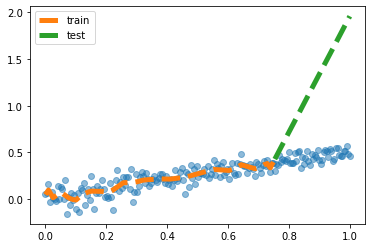

In [63]:
plt.plot(x, y, 'o', alpha = 0.5)
plt.plot(xtrain, net(xtrain).data, '--', label = 'train', lw = 5)
plt.plot(xtest, net(xtest).data, '--', label = 'test', lw = 5)
plt.legend()

`(4)` 아래와 같은 Dropout Layer를 (2)의 네트워크 중 적절한 위치에 추가하라. 그리고 다시 $\big( {\boldsymbol x}_{train},{\boldsymbol y}_{train}\big)$만을 사용해 모형을 재학습하라. 

```python
torch.nn.Dropout(0.5)
```

In [64]:
torch.manual_seed(201715447)
net = torch.nn.Sequential(torch.nn.Linear(1, 4096),
                         torch.nn.ReLU(),
                         torch.nn.Dropout(0.5),
                         torch.nn.Linear(4096, 1))
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

In [65]:
for epoch in range(10000):
    loss = loss_fn(net(xtrain), ytrain)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

`(5)` (4)에서 수정한 네트워크에 대한 $net({\boldsymbol x}_{test})$의 결과를 시각화 하라.

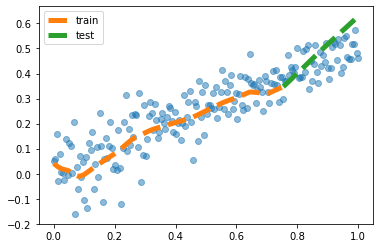

In [66]:
net.eval()
plt.plot(x, y, 'o', alpha = 0.5)
plt.plot(xtrain, net(xtrain).data, '--', label = 'train', lw = 5)
plt.plot(xtest, net(xtest).data, '--', label = 'test', lw = 5)
plt.legend()

# 4. Overparameterized Model

`-` 아래와 같은 자료가 있다고 가정

In [67]:
x = torch.rand([1000, 1]) * 2 - 1
y = 3.14 + 6.28 * x + torch.randn([1000, 1])

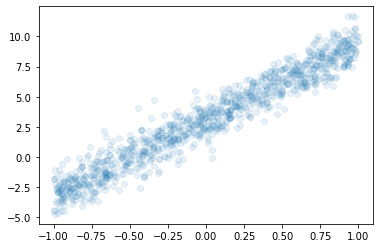

In [69]:
plt.plot(x, y, 'o', alpha = 0.1)

**hint: 이 모형은 $y_i = 3.14 + 6.28 x_i+ \epsilon_i$ 에서 생성 (기존 $y_i = 6.28 + 3.14 x_i +\epsilon_i$ 에서 수정)**

`(1)` 아래의 모형을 가정하고 $\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \beta_1 x_i + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

(풀이)

In [70]:
net = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

Text(0.5, 1.0, '$model:= \\beta_0+\\beta_1x_i$ (before learning)')

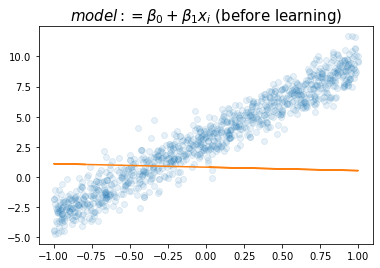

In [71]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(x).data, '-')
plt.title(r"$model:= \beta_0+\beta_1x_i$ (before learning)", size = 15)

In [72]:
for epoch in range(100):
    yhat = net(x)
    loss = torch.mean((yhat - y) ** 2)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, '$model:= \\beta_0+\\beta_1x_i$ (after 100 epochs)')

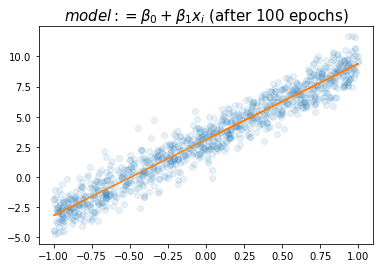

In [73]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(x).data, '-')
plt.title(r"$model:= \beta_0+\beta_1x_i$ (after 100 epochs)", size=15)

In [75]:
net.weight.data, net.bias.data

(tensor([[6.2940]]), tensor([3.1134]))

 - 참 값 6.28, 3.14가 적절하게 추정되었음

`(2)` 아래의 모형을 가정하고 $\beta_0$를 파이토치를 이용하여 추정하라. 

- $y_i = \beta_0  + \epsilon_i,\quad \epsilon_i \sim N(0,\sigma^2)$

(풀이)

In [76]:
w0hat = torch.tensor([0.00], requires_grad = True)

Text(0.5, 1.0, '$model:= \\beta_0+0\\times x_i$ (before learing)')

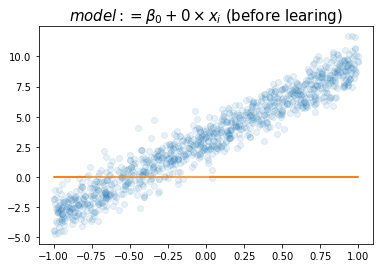

In [77]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, (x * 0 + w0hat).data, '-')
plt.title(r"$model:= \beta_0+0\times x_i$ (before learing)", size=15)

In [78]:
for epoch in range(100):
    yhat = x * 0 + w0hat
    loss = torch.mean((yhat - y) ** 2)
    loss.backward()
    w0hat.data = w0hat.data - 0.1 * w0hat.grad
    w0hat.grad = None

Text(0.5, 1.0, '$model:= \\beta_0+ 0\\times x_i$ (after 100 epochs)')

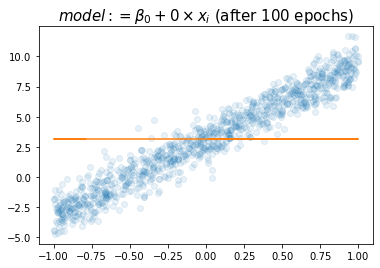

In [79]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, (x * 0 + w0hat).data, '-')
plt.title(r"$model:= \beta_0+ 0\times x_i$ (after 100 epochs)", size=15)

In [80]:
w0hat

tensor([3.1839], requires_grad=True)

 - $w_0$의 참값인 3.14가 적절하게 추정되었음. 

(참고) 위에서 추정된 값은 이론적으로 아래와 같게 됩니다.

In [81]:
y.mean()

tensor(3.1839)

`(3)` 아래의 모형을 가정하고 $\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

(풀이)

In [82]:
net = torch.nn.Linear(in_features = 1, out_features = 1, bias = False)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

Text(0.5, 1.0, '$model:= \\beta_1x_i$ (before learing)')

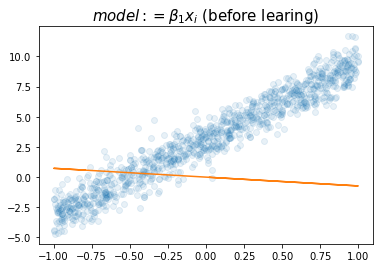

In [83]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(x).data, '-')
plt.title(r"$model:= \beta_1x_i$ (before learing)", size=15)

In [86]:
for epoch in range(100):
    yhat = net(x)
    loss = torch.mean((yhat - y) ** 2)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, '$model:= \\beta_1x_i$ (after 100 epochs)')

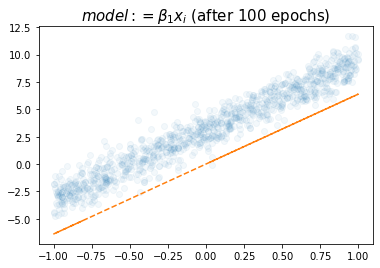

In [88]:
plt.plot(x, y, 'o', alpha = 0.05)
plt.plot(x, net(x).data, '--')
plt.title(r"$model:= \beta_1x_i$ (after 100 epochs)", size=15)

In [89]:
net.weight

Parameter containing:
tensor([[6.3954]], requires_grad=True)

 - 참 값인 6.28과 비슷하다

`(4)` 아래의 모형을 가정하고 $\alpha_0,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라. 

- $y_i = \alpha_0+\beta_0+ \beta_1x_i  + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$

$\hat{\alpha}_0+\hat{\beta}_0$은 얼마인가? 이 값과  문제 (1)에서 추정된 $\hat{\beta_0}$의 값과 비교하여 보라. 

(풀이)

In [91]:
_1 = torch.ones([1000, 1])
X = torch.concat([_1, x], axis = 1)

In [92]:
net = torch.nn.Linear(in_features = 2, out_features = 1)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ \\beta_1x_i$ (before learing)')

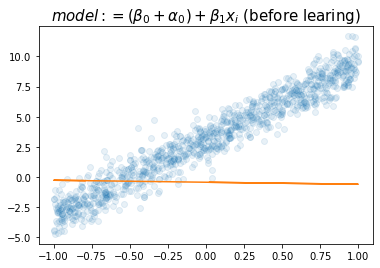

In [94]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(X).data, '-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ \beta_1x_i$ (before learing)", size=15)

In [95]:
for epoch in range(100):
    yhat = net(X)
    loss = torch.mean((y - yhat) ** 2)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ \\beta_1x_i$ (after 100 epochs)')

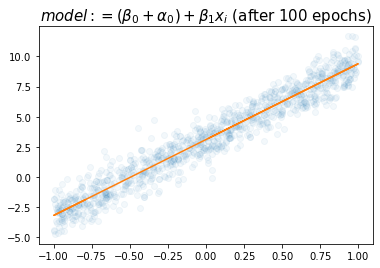

In [96]:
plt.plot(x, y, 'o', alpha = 0.05)
plt.plot(x, net(X).data, '-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ \beta_1x_i$ (after 100 epochs)", size=15)

In [97]:
net.bias, net.weight

(Parameter containing:
 tensor([1.3872], requires_grad=True),
 Parameter containing:
 tensor([[1.7262, 6.2941]], requires_grad=True))

In [98]:
1.3872 + 1.7262

3.1134

6.2940 과 3.1134와 추정된 값이 비슷한 것을 알 수 있다.

`(5)` 아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을 파이토치를 이용하여 추정하라.

- $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$ 

$\hat{\alpha}_0+\hat{\beta}_0$, $\hat{\alpha}_1 + \hat{\beta}_1$의 값은 각각 얼마인가? 이 값들을 (1) 에서 추정된 $\hat{\beta}_0$, $\hat{\beta}_1$ 값들과 비교하라. 

(풀이)

In [99]:
X = torch.concat([_1, _1, x, x], axis = 1)
X

tensor([[ 1.0000,  1.0000,  0.0236,  0.0236],
        [ 1.0000,  1.0000,  0.9341,  0.9341],
        [ 1.0000,  1.0000, -0.0923, -0.0923],
        ...,
        [ 1.0000,  1.0000, -0.5708, -0.5708],
        [ 1.0000,  1.0000, -0.9466, -0.9466],
        [ 1.0000,  1.0000, -0.7936, -0.7936]])

In [100]:
net = torch.nn.Linear(in_features = 4, out_features = 1, bias = False)
optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ (\\beta_1+\\alpha_1)x_i$ (before learing)')

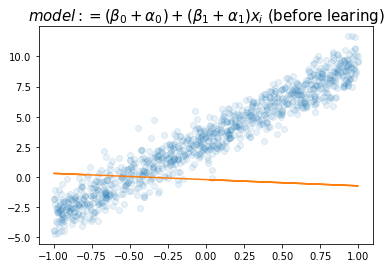

In [101]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(X).data, '-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ (\beta_1+\alpha_1)x_i$ (before learing)", size=15)

In [102]:
for epoch in range(100):
    yhat = net(X)
    loss = torch.mean((y - yhat) ** 2)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, '$model:= (\\beta_0+\\alpha_0)+ (\\beta_1+\\alpha_1)x_i$ (after 100 epochs)')

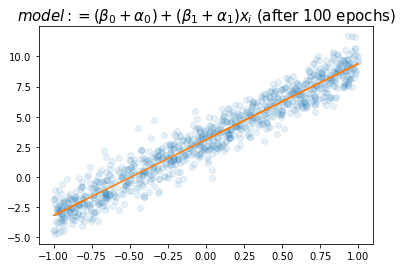

In [103]:
plt.plot(x, y, 'o', alpha = 0.1)
plt.plot(x, net(X).data, '-')
plt.title(r"$model:= (\beta_0+\alpha_0)+ (\beta_1+\alpha_1)x_i$ (after 100 epochs)", size=15)

In [104]:
net.weight

Parameter containing:
tensor([[1.3002, 1.8131, 2.9633, 3.3355]], requires_grad=True)

In [105]:
[1.3002 + 1.8131, 2.9633 + 3.3355]

[3.1132999999999997, 6.2988]

- $\hat{\alpha}_0+\hat{\beta}_0=3.1133$, $\hat{\alpha}_1+\hat{\beta}_1=6.2988$ 

`(6)` 다음은 위의 모형에 대하여 학생들이 discussion한 결과이다. 올바르게 해석한 학생을 모두 골라라. 

**민정**: $(x_i,y_i)$의 산점도는 직선모양이고 직선의 절펴과 기울기 모두 유의미해 보이므로 $y_i = \beta_0 + \beta_1 x_i$ 꼴을 적합하는게 좋겠다. 

**슬기**: 나도 그렇게 생각해. 그래서 (2)-(3)과 같이 기울기를 제외하고 적합하거나 절편을 제외하고 적합하면 underfitting의 상황에 빠질 수 있어. 

**성재**: (2)의 경우 사실상 $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$를 추정하는 것과 같아지게 되지. 

**세민**: (4)의 경우 ${\bf X}=\begin{bmatrix} 1  & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_n \end{bmatrix}$ 와 같이 설정하고 네트워크를 아래와 같이 설정할 경우 얻어지는 모형이야. 
```python
net = torch.nn.Linear(in_features=2,out_features=1,bias=True)
```

**구환**: 모델 (4)-(5)는 표현력은 (1)과 동일하지만 추정할 파라메터는 (1)보다 많으므로 효율적인 모델이라고 볼 수 없어. 

(풀이)

답 : 모두 맞게 서술함

(해설)

***under fitting*** 

(2)-(3)은 각각 원래직선의 기울기와 절편을 설명할 수 없는 구조이므로 모형의 표현력이 약한 상황이다. 따라서 underfitting 이 된다.

***overparameterized model***

(4)-(5)는 (1)에 대비하여 학습할 파라메터는 상승하였으나 모형의 표현력은 (1)과 동일한 상황이다. 실제로 직선의 적합을 만들기 위해서는 기울기를 의미하는 파라메터와 절편을 의미하는 파라메터 2개로 충분하다. 하지만 (4)의 경우 절편을 표현함에 있어서 $\alpha_0, \beta_0$ 두 개의 파라메터를 썼으므로 파라메터의 낭비가 있다고 볼 수 있다. (5)의 경우 절편의 표현에서 파라메터의 낭비가 있었고 또한 기울기의 표현에서도 $\alpha_1,\beta_1$ 두 개의 파라메터를 사용하였으므로 낭비가 있다.

전통적인 통계학에서는 이처럼 잘못계획된 모형이 파라메터를 추정할때 큰 방해요소이지만 경사하강법을 base로 학습하는 경우 크게 문제되지 않는다. ($\hat{\alpha}_0+\hat{\beta}_0$이 절편의 추정값 역할을, $\hat{\alpha}_1+\hat{\beta}_1$이 기울기의 추정값 역할을 한다.) 여기에서 "왜 pytorch나 tensorflow에서 구현되는 경사하강법 based method 에서는 문제가 되지 않는가?" 에 대한 질문에 답을 하기 위해서는 기계학습 혹은 회귀분석에서 다루는 능형회귀(ridge)를 이해해야 한다. 이 부분은 본 교과과정 범위 밖이라 생각하므로 자세한 서술은 생략한다. (궁금하면 메일로 물어보세요, 단 ridge를 이해한 상태에서 물어보셔야합니다)

***overfiting***

단순히 파라메터를 많이 쓴다고 오버피팅이 되는건 아니다. 파라메터를 많이써서 모형의 표현력이 올라가야 오버피팅의 가능성이 있다. (4)-(5)의 경우 파라메터를 많이 썼으나 모형의 표현력이 상승한 것은 아니므로 오버피팅상황은 아니다. 

***(2)에서 절편만 정확하게 학습되는 이유*** 

결국 $loss=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\frac{1}{n}\sum_{i=1}^{n}(y_i-w_0)^2$ 와 같은 형태이다. 

경사하강법은 loss가 최소화되는 $w_0$를 찾아주는 방법인데, 경사하강법을 이용하지 않고 이론적으로 해결한다면 $\frac{\partial}{\partial w_0}loss=0$을 계산하여 풀면 된다. 

$\frac{\partial}{\partial w_0}loss=0 \Longleftrightarrow  \frac{1}{n}\sum_{i=1}^{n}(-2)(y_i-w_0)=0$ 이고

$\frac{1}{n}\sum_{i=1}^{n}(-2)(y_i-w_0)$를 $w_0$에 대하여 정리하면 $\hat{w}_0=\frac{1}{n}\sum_{i=1}^{n}y_i$ 이 된다. 

# `5`. 다음을 읽고 참 거짓을 판단하여라. 

`(1)` 로지스틱 모형은 Adam 옵티마이저가 아닐 경우 적합시키는 것이 불가능하다. (거짓) 

`-` IAB 딥러닝 수업 자료를 기반으로 공부한 내용입니다.